## **Finance Property Searches (Townsville)**

In [3]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
# Loading dataset
df1 = pd.read_excel("fin_prop_search.xlsx") # Id is the index

In [4]:
# Checking columns
df1.head()

,_id,Month,Property Search,Property Search and Water Meter Reading,Water Meter Reading,Rates Statement,Ownership Statement,Total
0,1,2017-01-01,242,31,18,371,31,693
1,2,2017-02-01,254,42,14,361,27,698
2,3,2017-03-01,324,56,16,403,50,849
3,4,2017-04-01,221,38,4,308,11,582
4,5,2017-05-01,226,31,8,356,30,651


In [5]:
# Checking data types
df1.dtypes

_id                                                 int64
Month                                      datetime64[ns]
Property Search                                     int64
Property Search and Water Meter Reading             int64
Water Meter Reading                                 int64
Rates Statement                                     int64
Ownership Statement                                 int64
Total                                               int64
dtype: object

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Year                                     102 non-null    int32
 1   Month                                    102 non-null    int32
 2   Property Search                          102 non-null    int64
 3   Property Search and Water Meter Reading  102 non-null    int64
 4   Water Meter Reading                      102 non-null    int64
 5   Rates Statement                          102 non-null    int64
 6   Ownership Statement                      102 non-null    int64
 7   Total                                    102 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 5.7 KB


## Breaking down dataset by year

In [6]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['Year'] = df1['Month'].dt.year
df1['Month'] = df1['Month'].dt.month
# Placing year column at the starting index
df1 = df1[ ['Year'] + [col for col in df1.columns if col != 'Year'] ] 
# Removing index column
df1 = df1.drop('_id', axis = 1) # index can act as id column

In [7]:
df1.head()

,Year,Month,Property Search,Property Search and Water Meter Reading,Water Meter Reading,Rates Statement,Ownership Statement,Total
0,2017,1,242,31,18,371,31,693
1,2017,2,254,42,14,361,27,698
2,2017,3,324,56,16,403,50,849
3,2017,4,221,38,4,308,11,582
4,2017,5,226,31,8,356,30,651


In [8]:
year = list(df1['Year']) #Years as a list
df1['Year'].unique() # All years used in dataset

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype=int32)

### Mapping out statistics for each year

In [9]:
df2017 = df1[df1['Year'] == 2017]

Text(0.5, 1.0, 'Monthly totals for 2017')

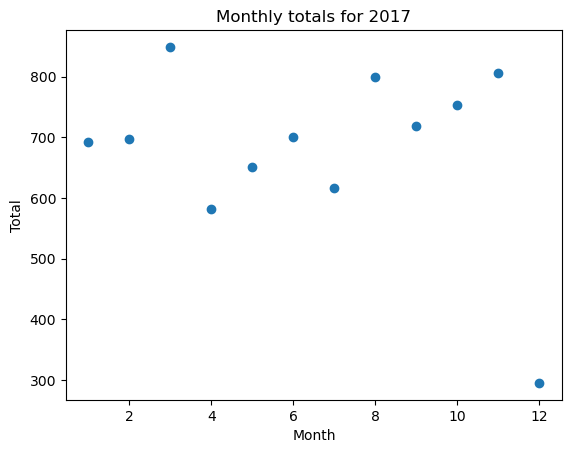

In [14]:
# Month vs Total

plt.scatter(df2017['Month'], df2017['Total'])
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Monthly totals for 2017')

### Examining each year on the same axis.

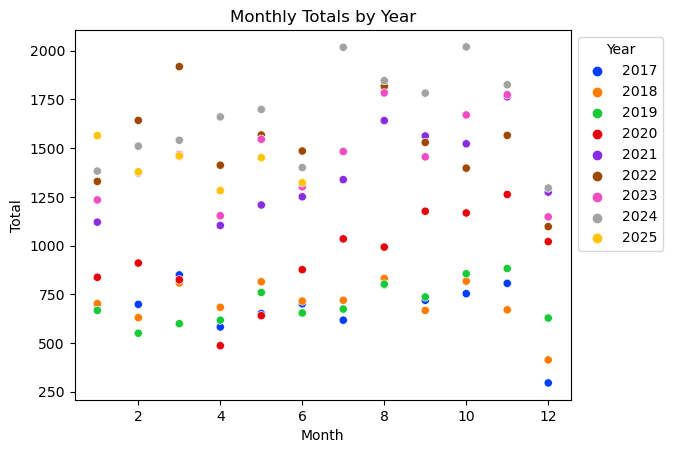

In [33]:
totals = sns.scatterplot(data = df1, x = 'Month', y = 'Total', hue = 'Year', palette = 'bright', legend = 'brief')
plt.title('Monthly Totals by Year')
#Moving legend to better position
sns.move_legend(totals, "upper left", bbox_to_anchor=(1,1))

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


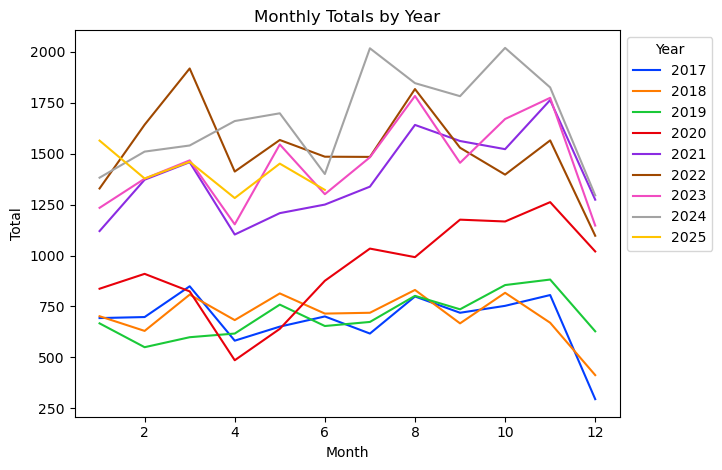

In [37]:
totals = sns.lineplot(data = df1, x = 'Month', y = 'Total', hue = 'Year', palette = 'bright', legend = 'brief')
plt.title('Monthly Totals by Year')
plt.tight_layout()
sns.move_legend(totals, "upper left", bbox_to_anchor=(1,1))

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


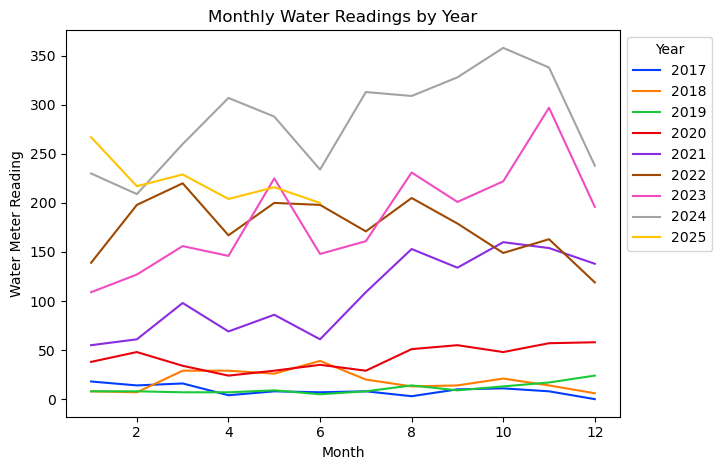

In [39]:
# Single variable
water_reads = sns.lineplot(data = df1, x = 'Month', y = 'Water Meter Reading', hue = 'Year', palette = 'bright', legend = 'brief')
plt.title('Monthly Water Readings by Year')
plt.tight_layout()
sns.move_legend(water_reads, "upper left", bbox_to_anchor=(1,1))

### Summary statistics by year

In [40]:
y = list(df1['Year'].unique())

In [54]:
# Water Meter Readings

#Write a loop to iterate through the years

for i in y:
    stats = df1['Water Meter Reading'][df1['Year'] == i]
    print(f"Year: {i}")
    print(stats.describe())
    print()

Year: 2017
count    12.000000
mean      8.916667
std       5.299371
min       0.000000
25%       6.250000
50%       8.000000
75%      11.750000
max      18.000000
Name: Water Meter Reading, dtype: float64

Year: 2018
count    12.000000
mean     18.833333
std      10.329423
min       6.000000
25%      11.750000
50%      17.000000
75%      26.750000
max      39.000000
Name: Water Meter Reading, dtype: float64

Year: 2019
count    12.000000
mean     10.750000
std       5.395705
min       5.000000
25%       7.750000
50%       8.500000
75%      13.250000
max      24.000000
Name: Water Meter Reading, dtype: float64

Year: 2020
count    12.000000
mean     42.166667
std      12.036560
min      24.000000
25%      32.750000
50%      43.000000
75%      52.000000
max      58.000000
Name: Water Meter Reading, dtype: float64

Year: 2021
count     12.000000
mean     106.500000
std       40.144059
min       55.000000
25%       67.000000
50%      103.500000
75%      141.750000
max      160.000000
Name:

# Linear Regression Modelling

<Axes: xlabel='Water Meter Reading', ylabel='Total'>

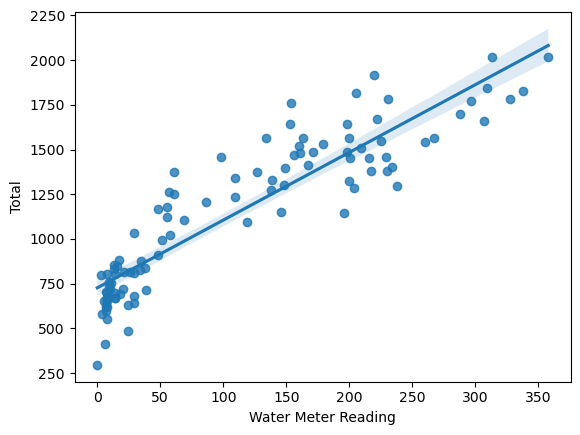

In [61]:
sns.regplot(x = 'Water Meter Reading', y = 'Total', data = df1)

In [14]:
# Regression
lri = LinearRegression()

# Data splitting
X = np.array(df1['Water Meter Reading']).reshape((-1,1))
y = df1['Total']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 13)

In [15]:
# Features / ind variables
lri.fit(X_train, y_train)

# Predict
y_pred = lri.predict(X_test)

**Assessing linear regression performance**

In [20]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R-squared: 0.85
MSE: 33731.47
RMSE: 183.66
MAE: 145.71


**Charting residuals**

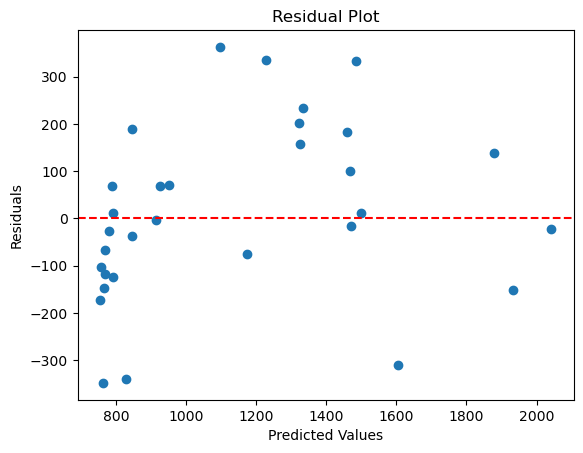

In [23]:
res = y_test - y_pred
plt.scatter(y_pred, res)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [36]:
res.describe()

count     31.000000
mean      13.248455
std      186.210857
min     -347.668324
25%     -109.987497
50%       -3.478843
75%      148.373824
max      362.603873
Name: Total, dtype: float64